## Reading data

In [1]:
import pandas as pd
import numpy as np
import string

In [2]:
spaceship=pd.read_csv('train (2).csv')

In [24]:
x=spaceship.drop('Transported',axis=1)
y=spaceship['Transported']

In [4]:
x

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre


In [5]:
x.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64

In [6]:
y.isna().sum()

0

## Filling missing data

### Spliting Data

In [12]:
def cabin_split(data):
    cabin_deck=[]
    cabin_side=[]
    for k in range(len(data)):
        cabin_deck.append('')
        cabin_side.append('')
    for i in range(len(data)):
        j=data.iloc[i]
        j=str(j)
        for c in range(len(j)):
             if j[c] in string.punctuation:
                j = j.replace(j[c], ' ')
        data.iloc[i]=j
        split_deck=j.split(' ')
        if len(split_deck)==1:
            cabin_deck[i]='NO'
            cabin_side[i]='NO'
            data.iloc[i]=-1
        else:
            cabin_deck[i]=split_deck[0]
            data.iloc[i]=int(split_deck[1])
            cabin_side[i]=split_deck[2]
    
    x['Cabin_side']=cabin_side
    
    return cabin_deck

In [25]:
x['Cabin_deck']=cabin_split(x.Cabin)
x

C:\Users\PIYUSH DWIVEDI\AppData\Local\Temp\ipykernel_15740\1354872282.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[i]=j
C:\Users\PIYUSH DWIVEDI\AppData\Local\Temp\ipykernel_15740\1354872282.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[i]=int(split_deck[1])
C:\Users\PIYUSH DWIVEDI\AppData\Local\Temp\ipykernel_15740\1354872282.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[i]=-1


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin_side,Cabin_deck
0,0001_01,Europa,False,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,P,B
1,0002_01,Earth,False,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,S,F
2,0003_01,Europa,False,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,S,A
3,0003_02,Europa,False,0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,S,A
4,0004_01,Earth,False,1,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,S,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,98,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,P,A
8689,9278_01,Earth,True,1499,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,S,G
8690,9279_01,Earth,False,1500,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,S,G
8691,9280_01,Europa,False,608,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,S,E


In [9]:
def pas_split(data):
    pas_p=[]
    for k in range(len(data)):
        pas_p.append('')
    for i in range(len(data)):
        j=data.iloc[i]
        j=str(j)
        for c in range(len(j)):
             if j[c] in string.punctuation:
                j = j.replace(j[c], ' ')
        data.iloc[i]=j
        split_deck=j.split(' ')
        
        data.iloc[i]=int(split_deck[0])
        pas_p[i]=int(split_deck[1])
    
    return pas_p
    

In [26]:
x['PassengerId_p']=pas_split(x.PassengerId)
x

C:\Users\PIYUSH DWIVEDI\AppData\Local\Temp\ipykernel_15740\4018415752.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[i]=j
C:\Users\PIYUSH DWIVEDI\AppData\Local\Temp\ipykernel_15740\4018415752.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[i]=int(split_deck[0])


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin_side,Cabin_deck,PassengerId_p
0,1,Europa,False,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,P,B,1
1,2,Earth,False,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,S,F,1
2,3,Europa,False,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,S,A,1
3,3,Europa,False,0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,S,A,2
4,4,Earth,False,1,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,S,F,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276,Europa,False,98,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,P,A,1
8689,9278,Earth,True,1499,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,S,G,1
8690,9279,Earth,False,1500,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,S,G,1
8691,9280,Europa,False,608,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,S,E,1


In [22]:
def spl_name(data):
    last_name=[]
    for k in range(len(data)):
        last_name.append('')
    for i in range(len(data)):
        j=data.iloc[i]
        j=str(j)
        split_name=j.split(' ')
        if len(split_name)==1:
            last_name[i]='last_name_missing'
            data.iloc[i]='first_name_missing'
        else:
            last_name[i]=split_name[1]
            data.iloc[i]=split_name[0]
    return last_name

In [27]:
x['last_name']=spl_name(x.Name)
x

C:\Users\PIYUSH DWIVEDI\AppData\Local\Temp\ipykernel_15740\3554723259.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[i]=split_name[0]
C:\Users\PIYUSH DWIVEDI\AppData\Local\Temp\ipykernel_15740\3554723259.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[i]='first_name_missing'


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin_side,Cabin_deck,PassengerId_p,last_name
0,1,Europa,False,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham,P,B,1,Ofracculy
1,2,Earth,False,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna,S,F,1,Vines
2,3,Europa,False,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark,S,A,1,Susent
3,3,Europa,False,0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam,S,A,2,Susent
4,4,Earth,False,1,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy,S,F,1,Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276,Europa,False,98,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior,P,A,1,Noxnuther
8689,9278,Earth,True,1499,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta,S,G,1,Mondalley
8690,9279,Earth,False,1500,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey,S,G,1,Connon
8691,9280,Europa,False,608,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon,S,E,1,Hontichre


In [113]:
x_test.isna().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name             0
Cabin_side       0
Cabin_deck       0
PassengerId_p    0
last_name        0
dtype: int64

In [31]:
x=pd.get_dummies(x, columns=['Cabin_deck','Cabin_side','VIP','Destination','CryoSleep','HomePlanet'])
x

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,PassengerId_p,...,Destination_Destination_missing,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_False,CryoSleep_True,CryoSleep_CryoSleep_missing,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_HomePlanet_missing,HomePlanet_Mars
0,1,0,39.0,0.0,0.0,0.0,0.0,0.0,Maham,1,...,0,0,1,1,0,0,0,1,0,0
1,2,0,24.0,109.0,9.0,25.0,549.0,44.0,Juanna,1,...,0,0,1,1,0,0,1,0,0,0
2,3,0,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark,1,...,0,0,1,1,0,0,0,1,0,0
3,3,0,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam,2,...,0,0,1,1,0,0,0,1,0,0
4,4,1,16.0,303.0,70.0,151.0,565.0,2.0,Willy,1,...,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276,98,41.0,0.0,6819.0,0.0,1643.0,74.0,Gravior,1,...,0,0,0,1,0,0,0,1,0,0
8689,9278,1499,18.0,0.0,0.0,0.0,0.0,0.0,Kurta,1,...,0,1,0,0,1,0,1,0,0,0
8690,9279,1500,26.0,0.0,0.0,1872.0,1.0,0.0,Fayey,1,...,0,0,1,1,0,0,1,0,0,0
8691,9280,608,32.0,0.0,1049.0,0.0,353.0,3235.0,Celeon,1,...,0,0,0,1,0,0,0,1,0,0


### Filling Data

In [29]:
array1=['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
for i in array1: 
   x[i].fillna(-1,inplace=True)
x['VIP'].fillna('VIP_missing',inplace=True)
x['Destination'].fillna('Destination_missing',inplace=True)
x['CryoSleep'].fillna('CryoSleep_missing',inplace=True)
x['HomePlanet'].fillna('HomePlanet_missing',inplace=True)

In [32]:
for label,content in x.items():
    if not pd.api.types.is_numeric_dtype(content):
        x[label]=pd.Categorical(content).codes+1

C:\Users\PIYUSH DWIVEDI\AppData\Local\Temp\ipykernel_15740\3657355798.py:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  x[label]=pd.Categorical(content).codes+1
C:\Users\PIYUSH DWIVEDI\AppData\Local\Temp\ipykernel_15740\3657355798.py:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  x[label]=pd.Categorical(content).codes+1


In [52]:
def total(data,arr):
    to=[]
    for k in range(len(data)):
        to.append('')
    for i in range(len(data)):
        l=0
        for j in arr:
            if  x[j].iloc[i] != -1:
                l=l+x[j].iloc[i]
        to[i]=l

    return to

In [53]:
array2=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
x['luxury_amenities']=total(x.Spa,array2)
x

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,PassengerId_p,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_False,CryoSleep_True,CryoSleep_CryoSleep_missing,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_HomePlanet_missing,HomePlanet_Mars,luxury_amenities
0,1,2,39.0,0.0,0.0,0.0,0.0,0.0,1615,1,...,0,1,1,0,0,0,1,0,0,0.0
1,2,2,24.0,109.0,9.0,25.0,549.0,44.0,1408,1,...,0,1,1,0,0,1,0,0,0,736.0
2,3,2,58.0,43.0,3576.0,0.0,6715.0,49.0,157,1,...,0,1,1,0,0,0,1,0,0,10383.0
3,3,2,33.0,0.0,1283.0,371.0,3329.0,193.0,2277,2,...,0,1,1,0,0,0,1,0,0,5176.0
4,4,3,16.0,303.0,70.0,151.0,565.0,2.0,2643,1,...,0,1,1,0,0,1,0,0,0,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,6214,100,41.0,0.0,6819.0,0.0,1643.0,74.0,1136,1,...,0,0,1,0,0,0,1,0,0,8536.0
8689,6215,1491,18.0,0.0,0.0,0.0,0.0,0.0,1493,1,...,1,0,0,1,0,1,0,0,0,0.0
8690,6216,1492,26.0,0.0,0.0,1872.0,1.0,0.0,956,1,...,0,1,1,0,0,1,0,0,0,1873.0
8691,6217,610,32.0,0.0,1049.0,0.0,353.0,3235.0,527,1,...,0,0,1,0,0,0,1,0,0,4637.0


In [41]:
x.drop('luxury_amenities',axis=1,inplace=True)

## Modeling

### Creating train and validetion set

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val= train_test_split(x, y, test_size=0.2, random_state=42)

### Testing in Model

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
np.random.seed(42)
models={
    'LR':LogisticRegression(),
    'KN':KNeighborsClassifier(),
    'RF':RandomForestClassifier()
}
def fit_and_score(models, x_train, x_val, y_train, y_val):
    model_score={}
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_score[name]=model.score(x_val, y_val)
    return model_score

In [69]:
np.random.seed(42)
model_score=fit_and_score(models, x_train, x_val, y_train, y_val)
model_score

c:\CODDING\data_science\Spaceship Titanic\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LR': 0.7745830937320299, 'KN': 0.7475560667050029, 'RF': 0.7947096032202415}

## Hyperparameter tuning

In [61]:
train_scores=[]
test_scores=[]

neighbors=range(1,21)

knn=KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_val,y_val))

In [62]:
train_scores

[1.0,
 0.8564854759850445,
 0.8560540696002301,
 0.8340523439746909,
 0.8313201035375324,
 0.8208225481737129,
 0.818521714121369,
 0.8142076502732241,
 0.8117630140926085,
 0.8061547310900201,
 0.8060109289617486,
 0.8032786885245902,
 0.8005464480874317,
 0.7985332182916307,
 0.8001150417026172,
 0.7965199884958297,
 0.7972389991371872,
 0.7962323842392868,
 0.7968075927523728,
 0.7952257693413862]

In [63]:
test_scores

[0.7113283496262219,
 0.6963772282921219,
 0.7446808510638298,
 0.7377803335250144,
 0.7475560667050029,
 0.7360552041403106,
 0.7556066705002875,
 0.7544565842438183,
 0.7561817136285222,
 0.7567567567567568,
 0.7544565842438183,
 0.7573317998849913,
 0.7550316273720529,
 0.7573317998849913,
 0.7573317998849913,
 0.757906843013226,
 0.7613571017826337,
 0.7613571017826337,
 0.7636572742955722,
 0.7607820586543991]

Maximum KNN score on test data: 76.37%


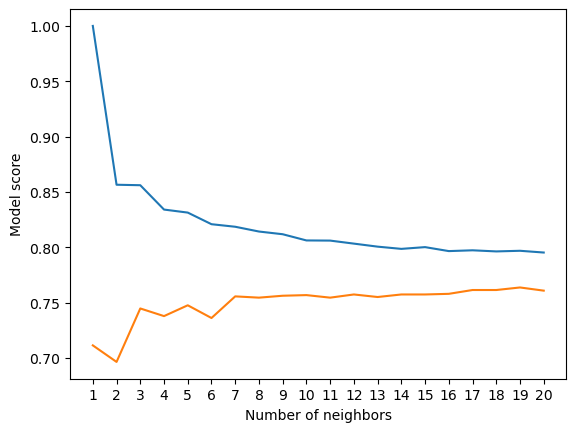

In [66]:
import matplotlib.pyplot as plt
plt.plot(neighbors, train_scores ,label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend

print(f"Maximum KNN score on test data: {max(test_scores)*100:.2f}%" )

### Randomized Search CV

In [77]:
log_reg_grid={"C": np.logspace(-4,4,20),
              "solver": ['liblinear']}

rf_grid={'n_estimators': np.arange(10,1000,50),
         'max_depth':[None, 3, 5, 10],
         'min_samples_split': np.arange(2,20,2),
         'min_samples_leaf': np.arange(1,20,2)}

In [70]:
np.random.seed(42)

rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)

rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [71]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.012742749857031334}

In [73]:
rs_log_reg.score(x_val, y_val)

0.7791834387579069

In [78]:
np.random.seed(42)

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=5,
                         n_iter=108,
                         verbose=True)

rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=108,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [79]:
rs_rf.best_params_

{'n_estimators': 960,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_depth': None}

In [80]:
np.random.seed(42)
rs_rf.score(x_val, y_val)

0.79700977573318

### Grid Search CV

In [86]:
np.random.seed(42)
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

rf_clf = RandomForestClassifier()

grid_search = GridSearchCV(rf_clf, param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)

c:\CODDING\data_science\Spaceship Titanic\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\CODDING\data_science\Spaceship Titanic\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\CODDING\data_science\Spaceship Titanic\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

KeyboardInterrupt: 

In [89]:
np.random.seed(42)

param_dist = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5],
    'max_features': ['auto', 'log2'],
    'bootstrap': [True],
    'criterion': ['gini']
}

rf_clf = RandomForestClassifier()

# Use Randomized Search instead of Grid Search
random_search = RandomizedSearchCV(
    rf_clf, param_distributions=param_dist, n_iter=100,
    scoring='accuracy', cv=5, random_state=42, n_jobs=-1
)

# Assuming x_train and y_train are your training data and labels
random_search.fit(x_train, y_train)

print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

c:\CODDING\data_science\Spaceship Titanic\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': None, 'criterion': 'gini', 'bootstrap': True}
Best Accuracy: 0.8078812923780314


In [90]:
prediction=random_search.predict(x_val)

In [99]:
np.random.seed(42)
predictor=RandomForestClassifier(n_estimators= 200, min_samples_split= 2, min_samples_leaf= 2, max_features= 'sqrt', max_depth= 20, criterion= 'entropy', bootstrap= False)
predictor.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=20,
                       min_samples_leaf=2, n_estimators=200)

In [100]:
prediction=predictor.predict(x_val)

In [101]:
prediction

array([False,  True,  True, ..., False,  True, False])

In [94]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (c:\CODDING\data_science\Spaceship Titanic\env\Lib\site-packages\sklearn\metrics\__init__.py)

In [102]:
print(confusion_matrix(y_val, prediction))

[[688 173]
 [181 697]]


## Final Answer

In [103]:
predictor.fit(x,y)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=20,
                       min_samples_leaf=2, n_estimators=200)

In [136]:
x_test=pd.read_csv('test.csv')
x_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [125]:
def cabin_split(data):
    cabin_deck=[]
    cabin_side=[]
    for k in range(len(data)):
        cabin_deck.append('')
        cabin_side.append('')
    for i in range(len(data)):
        j=data.iloc[i]
        j=str(j)
        for c in range(len(j)):
             if j[c] in string.punctuation:
                j = j.replace(j[c], ' ')
        data.iloc[i]=j
        split_deck=j.split(' ')
        if len(split_deck)==1:
            cabin_deck[i]='NO'
            cabin_side[i]='NO'
            data.iloc[i]=-1
        else:
            cabin_deck[i]=split_deck[0]
            data.iloc[i]=int(split_deck[1])
            cabin_side[i]=split_deck[2]
    
    x_test['Cabin_side']=cabin_side
    
    return cabin_deck

x_test['Cabin_deck']=cabin_split(x_test.Cabin)
x_test

C:\Users\PIYUSH DWIVEDI\AppData\Local\Temp\ipykernel_15740\1877027332.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[i]=j
C:\Users\PIYUSH DWIVEDI\AppData\Local\Temp\ipykernel_15740\1877027332.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[i]=int(split_deck[1])
C:\Users\PIYUSH DWIVEDI\AppData\Local\Temp\ipykernel_15740\1877027332.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[i]=-1


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin_side,Cabin_deck
0,0013_01,Earth,True,3,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,S,G
1,0018_01,Earth,False,4,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,S,F
2,0019_01,Europa,True,0,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,S,C
3,0021_01,Europa,False,1,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,S,C
4,0023_01,Earth,False,5,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,S,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,1496,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,S,G
4273,9269_01,Earth,False,-1,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NO,NO
4274,9271_01,Mars,True,296,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,P,D
4275,9273_01,Europa,False,297,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,P,D


In [126]:
def pas_split(data):
    pas_p=[]
    for k in range(len(data)):
        pas_p.append('')
    for i in range(len(data)):
        j=data.iloc[i]
        j=str(j)
        for c in range(len(j)):
             if j[c] in string.punctuation:
                j = j.replace(j[c], ' ')
        data.iloc[i]=j
        split_deck=j.split(' ')
        
        data.iloc[i]=int(split_deck[0])
        pas_p[i]=int(split_deck[1])
    
    return pas_p

x_test['PassengerId_p']=pas_split(x_test.PassengerId)
x_test

C:\Users\PIYUSH DWIVEDI\AppData\Local\Temp\ipykernel_15740\1872684811.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[i]=j
C:\Users\PIYUSH DWIVEDI\AppData\Local\Temp\ipykernel_15740\1872684811.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[i]=int(split_deck[0])


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin_side,Cabin_deck,PassengerId_p
0,13,Earth,True,3,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,S,G,1
1,18,Earth,False,4,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,S,F,1
2,19,Europa,True,0,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,S,C,1
3,21,Europa,False,1,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,S,C,1
4,23,Earth,False,5,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,S,F,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266,Earth,True,1496,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,S,G,2
4273,9269,Earth,False,-1,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NO,NO,1
4274,9271,Mars,True,296,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,P,D,1
4275,9273,Europa,False,297,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,P,D,1


In [127]:
def spl_name(data):
    last_name=[]
    for k in range(len(data)):
        last_name.append('')
    for i in range(len(data)):
        j=data.iloc[i]
        j=str(j)
        split_name=j.split(' ')
        if len(split_name)==1:
            last_name[i]='last_name_missing'
            data.iloc[i]='first_name_missing'
        else:
            last_name[i]=split_name[1]
            data.iloc[i]=split_name[0]
    return last_name

x_test['last_name']=spl_name(x_test.Name)
x_test

C:\Users\PIYUSH DWIVEDI\AppData\Local\Temp\ipykernel_15740\3376914617.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[i]=split_name[0]
C:\Users\PIYUSH DWIVEDI\AppData\Local\Temp\ipykernel_15740\3376914617.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[i]='first_name_missing'


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin_side,Cabin_deck,PassengerId_p,last_name
0,13,Earth,True,3,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly,S,G,1,Carsoning
1,18,Earth,False,4,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome,S,F,1,Peckers
2,19,Europa,True,0,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih,S,C,1,Unhearfus
3,21,Europa,False,1,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz,S,C,1,Caltilter
4,23,Earth,False,5,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence,S,F,1,Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266,Earth,True,1496,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron,S,G,2,Peter
4273,9269,Earth,False,-1,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty,NO,NO,1,Scheron
4274,9271,Mars,True,296,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin,P,D,1,Pore
4275,9273,Europa,False,297,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan,P,D,1,Conale


In [128]:
array1=['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
for i in array1: 
   x_test[i].fillna(-1,inplace=True)
x_test['VIP'].fillna('VIP_missing',inplace=True)
x_test['Destination'].fillna('Destination_missing',inplace=True)
x_test['CryoSleep'].fillna('CryoSleep_missing',inplace=True)
x_test['HomePlanet'].fillna('HomePlanet_missing',inplace=True)

In [129]:
x_test=pd.get_dummies(x_test, columns=['Cabin_deck','Cabin_side','VIP','Destination','CryoSleep','HomePlanet'])
x_test

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,PassengerId_p,...,Destination_Destination_missing,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_False,CryoSleep_True,CryoSleep_CryoSleep_missing,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_HomePlanet_missing,HomePlanet_Mars
0,13,3,27.0,0.0,0.0,0.0,0.0,0.0,Nelly,1,...,0,0,1,0,1,0,1,0,0,0
1,18,4,19.0,0.0,9.0,0.0,2823.0,0.0,Lerome,1,...,0,0,1,1,0,0,1,0,0,0
2,19,0,31.0,0.0,0.0,0.0,0.0,0.0,Sabih,1,...,0,0,0,0,1,0,0,1,0,0
3,21,1,38.0,0.0,6652.0,0.0,181.0,585.0,Meratz,1,...,0,0,1,1,0,0,0,1,0,0
4,23,5,20.0,10.0,0.0,635.0,0.0,0.0,Brence,1,...,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266,1496,34.0,0.0,0.0,0.0,0.0,0.0,Jeron,2,...,0,0,1,0,1,0,1,0,0,0
4273,9269,-1,42.0,0.0,847.0,17.0,10.0,144.0,Matty,1,...,0,0,1,1,0,0,1,0,0,0
4274,9271,296,-1.0,0.0,0.0,0.0,0.0,0.0,Jayrin,1,...,0,0,0,0,1,0,0,0,0,1
4275,9273,297,-1.0,0.0,2680.0,0.0,0.0,523.0,Kitakan,1,...,1,0,0,1,0,0,0,1,0,0


In [130]:
for label,content in x_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        x_test[label]=pd.Categorical(content).codes+1

C:\Users\PIYUSH DWIVEDI\AppData\Local\Temp\ipykernel_15740\1714300552.py:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  x_test[label]=pd.Categorical(content).codes+1
C:\Users\PIYUSH DWIVEDI\AppData\Local\Temp\ipykernel_15740\1714300552.py:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  x_test[label]=pd.Categorical(content).codes+1


In [131]:
def total(data,arr):
    to=[]
    for k in range(len(data)):
        to.append('')
    for i in range(len(data)):
        l=0
        for j in arr:
            if  x[j].iloc[i] != -1:
                l=l+x[j].iloc[i]
        to[i]=l

    return to

array2=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
x_test['luxury_amenities']=total(x_test.Spa,array2)

In [132]:
x_test

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,PassengerId_p,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_False,CryoSleep_True,CryoSleep_CryoSleep_missing,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_HomePlanet_missing,HomePlanet_Mars,luxury_amenities
0,1,5,27.0,0.0,0.0,0.0,0.0,0.0,1466,1,...,0,1,0,1,0,1,0,0,0,0.0
1,2,6,19.0,0.0,9.0,0.0,2823.0,0.0,1220,1,...,0,1,1,0,0,1,0,0,0,736.0
2,3,2,31.0,0.0,0.0,0.0,0.0,0.0,1710,1,...,0,0,0,1,0,0,1,0,0,10383.0
3,4,3,38.0,0.0,6652.0,0.0,181.0,585.0,1365,1,...,0,1,1,0,0,0,1,0,0,5176.0
4,5,7,20.0,10.0,0.0,635.0,0.0,0.0,367,1,...,0,1,1,0,0,1,0,0,0,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,3059,1305,34.0,0.0,0.0,0.0,0.0,0.0,1092,2,...,0,1,0,1,0,1,0,0,0,1619.0
4273,3060,1,42.0,0.0,847.0,17.0,10.0,144.0,1336,1,...,0,1,1,0,0,1,0,0,0,696.0
4274,3061,298,-1.0,0.0,0.0,0.0,0.0,0.0,1078,1,...,0,0,0,1,0,0,0,0,1,2504.0
4275,3062,299,-1.0,0.0,2680.0,0.0,0.0,523.0,1183,1,...,0,0,1,0,0,0,1,0,0,5733.0


In [133]:
array3=predictor.predict(x_test)

In [135]:
array3

array([ True, False,  True, ...,  True,  True,  True])

In [139]:
y_dict={'PassengerId':x_test['PassengerId'],'Transported': array3}
y_pred=pd.DataFrame(y_dict)
y_pred

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [141]:
y_pred.to_csv('y_pred.csv',index=False)